## Logistic Regression
<center><img src="../../img/regression_logistic.png" width="700"></center>

In [87]:
import sys
import shap
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

sys.path.append('..')
from utils.preprocessing import load_dataframes

from constants import CATEGORIES

In [88]:
(df_train, df_val, df_test) = load_dataframes()

In [89]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,overall_toxic
140030,ed56f082116dcbd0,Grandma Terri Should Burn in Trash \nGrandma T...,1,0,0,0,0,0,1
159124,f8e3cd98b63bf401,", 9 May 2009 (UTC)\nIt would be easiest if you...",0,0,0,0,0,0,0
60006,a09e1bcf10631f9a,"""\n\nThe Objectivity of this Discussion is dou...",0,0,0,0,0,0,0
65432,af0ee0066c607eb8,Shelly Shock\nShelly Shock is. . .( ),0,0,0,0,0,0,0
154979,b734772b1a807e09,I do not care. Refer to Ong Teng Cheong talk p...,0,0,0,0,0,0,0


In [90]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,overall_toxic
count,127656.000000,127656.00000,127656.000000,127656.000000,127656.000000,127656.000000,127656.000000
mean,0.095867,0.00998,0.052751,0.003165,0.049062,0.008703,0.101687
std,0.294410,0.09940,0.223537,0.056167,0.215997,0.092884,0.302238
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Binomial Classification

In [91]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train = vectorizer.fit_transform(df_train['comment_text'])
X_valid = vectorizer.transform(df_val['comment_text'])
X_test = vectorizer.transform(df_test['comment_text'])

y_train = df_train['overall_toxic']
y_valid = df_val['overall_toxic']
y_test = df_test['overall_toxic']

##### By default it's L2 regularization

In [92]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_valid, y_valid))
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred, target_names=['non-toxic', 'toxic']))

0.9552561491461695
              precision    recall  f1-score   support

   non-toxic       0.96      1.00      0.98     28671
       toxic       0.93      0.60      0.73      3244

    accuracy                           0.96     31915
   macro avg       0.95      0.80      0.85     31915
weighted avg       0.95      0.96      0.95     31915



Target classes (toxic/non-toxic) are not uniformed distributed so class_weight must be set to balanced

In [93]:
model = LogisticRegression(max_iter=1000,class_weight="balanced")
model.fit(X_train, y_train)
print(model.score(X_valid, y_valid))
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred, target_names=['non-toxic', 'toxic']))

0.9441641861193796
              precision    recall  f1-score   support

   non-toxic       0.98      0.95      0.97     28671
       toxic       0.68      0.85      0.76      3244

    accuracy                           0.94     31915
   macro avg       0.83      0.90      0.86     31915
weighted avg       0.95      0.94      0.95     31915



#### Let's try with different regularization values


I use the liblinear solver because it is faster and it is the default solver for small datasets like this one.\
C is the inverse of the regularization strength. Smaller values specify stronger regularization.

In [94]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear',class_weight="balanced" )
model_l1.fit(X_train, y_train)
model_l1.score(X_valid, y_valid)
y_pred = model_l1.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     28671
           1       0.68      0.86      0.76      3244

    accuracy                           0.95     31915
   macro avg       0.83      0.91      0.86     31915
weighted avg       0.95      0.95      0.95     31915



/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
model_no_penalty = LogisticRegression(penalty=None, class_weight="balanced")
model_no_penalty.fit(X_train, y_train)
model_no_penalty.score(X_valid, y_valid)
print(model_no_penalty.score(X_valid, y_valid))
y_pred = model_no_penalty.predict(X_valid)
print(classification_report(y_valid, y_pred))

0.9477048409838634
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28859
           1       0.73      0.73      0.73      3056

    accuracy                           0.95     31915
   macro avg       0.85      0.85      0.85     31915
weighted avg       0.95      0.95      0.95     31915



/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_l1 = LogisticRegression(penalty='l2', C=50, solver='liblinear',class_weight="balanced" )
model_l1.fit(X_train, y_train)
model_l1.score(X_valid, y_valid)
y_pred = model_l1.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     28859
           1       0.72      0.78      0.75      3056

    accuracy                           0.95     31915
   macro avg       0.85      0.87      0.86     31915
weighted avg       0.95      0.95      0.95     31915



In our context, recall is privileged. For an average equal accuracy, we achieve a 37% increase in recall with regularization, making it a valuable tool in our model's performance.

#### Now let's try all combinations of the logistic regression parameters

In [ ]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : [1, 10, 50, 100, 1000],
    'solver' : ['liblinear']
}

logistic = LogisticRegression(class_weight="balanced")

clf = GridSearchCV(logistic, param_grid, cv=5, verbose=True, n_jobs=-1, scoring="f1_macro")

best_clf = clf.fit(X_train, y_train)

print("Best Parameters: ", best_clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


#### So the best parameters looks like to be  {'C': 50, 'penalty': 'l2', 'solver': 'liblinear'}

Let's try with the best parameters on the validation set

In [ ]:
best_model = best_clf.best_estimator_
best_model.score(X_valid, y_valid)

0.9506188312705625

In [ ]:
best_model.score(X_valid, y_valid)
y_pred = best_model.predict(X_valid)
print(classification_report(y_valid, y_pred, target_names=['non-toxic', 'toxic']))

              precision    recall  f1-score   support

   non-toxic       0.98      0.97      0.97     28859
       toxic       0.71      0.81      0.76      3056

    accuracy                           0.95     31915
   macro avg       0.85      0.89      0.87     31915
weighted avg       0.95      0.95      0.95     31915



#### Let's try with the model on the test set

In [ ]:
best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['non-toxic', 'toxic']))

              precision    recall  f1-score   support

   non-toxic       0.99      0.89      0.94     57888
       toxic       0.47      0.88      0.61      6090

    accuracy                           0.89     63978
   macro avg       0.73      0.89      0.77     63978
weighted avg       0.94      0.89      0.91     63978



In [ ]:
best_model.get_params()

{'C': 10,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Shap Value

For each feature there is a lot of 0 shap value. That means that for a feature there is a lot of row which are not very dependent. It could be explained by the fact the X_train is a sparse matrix and for a lot of input the majority of words are not represented.

In [ ]:
explainer = shap.LinearExplainer(best_model, X_train, feature_perturbation="interventional", nsamples=500)    

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=vectorizer.get_feature_names_out(), max_display=50)

To view the more toxic word let just print the max shap value of each word/feature

/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/shap/explainers/_linear.py:210: UserWarning: Setting nsamples has no effect when feature_perturbation = 'interventional'!
  warnings.warn("Setting nsamples has no effect when feature_perturbation = 'interventional'!")


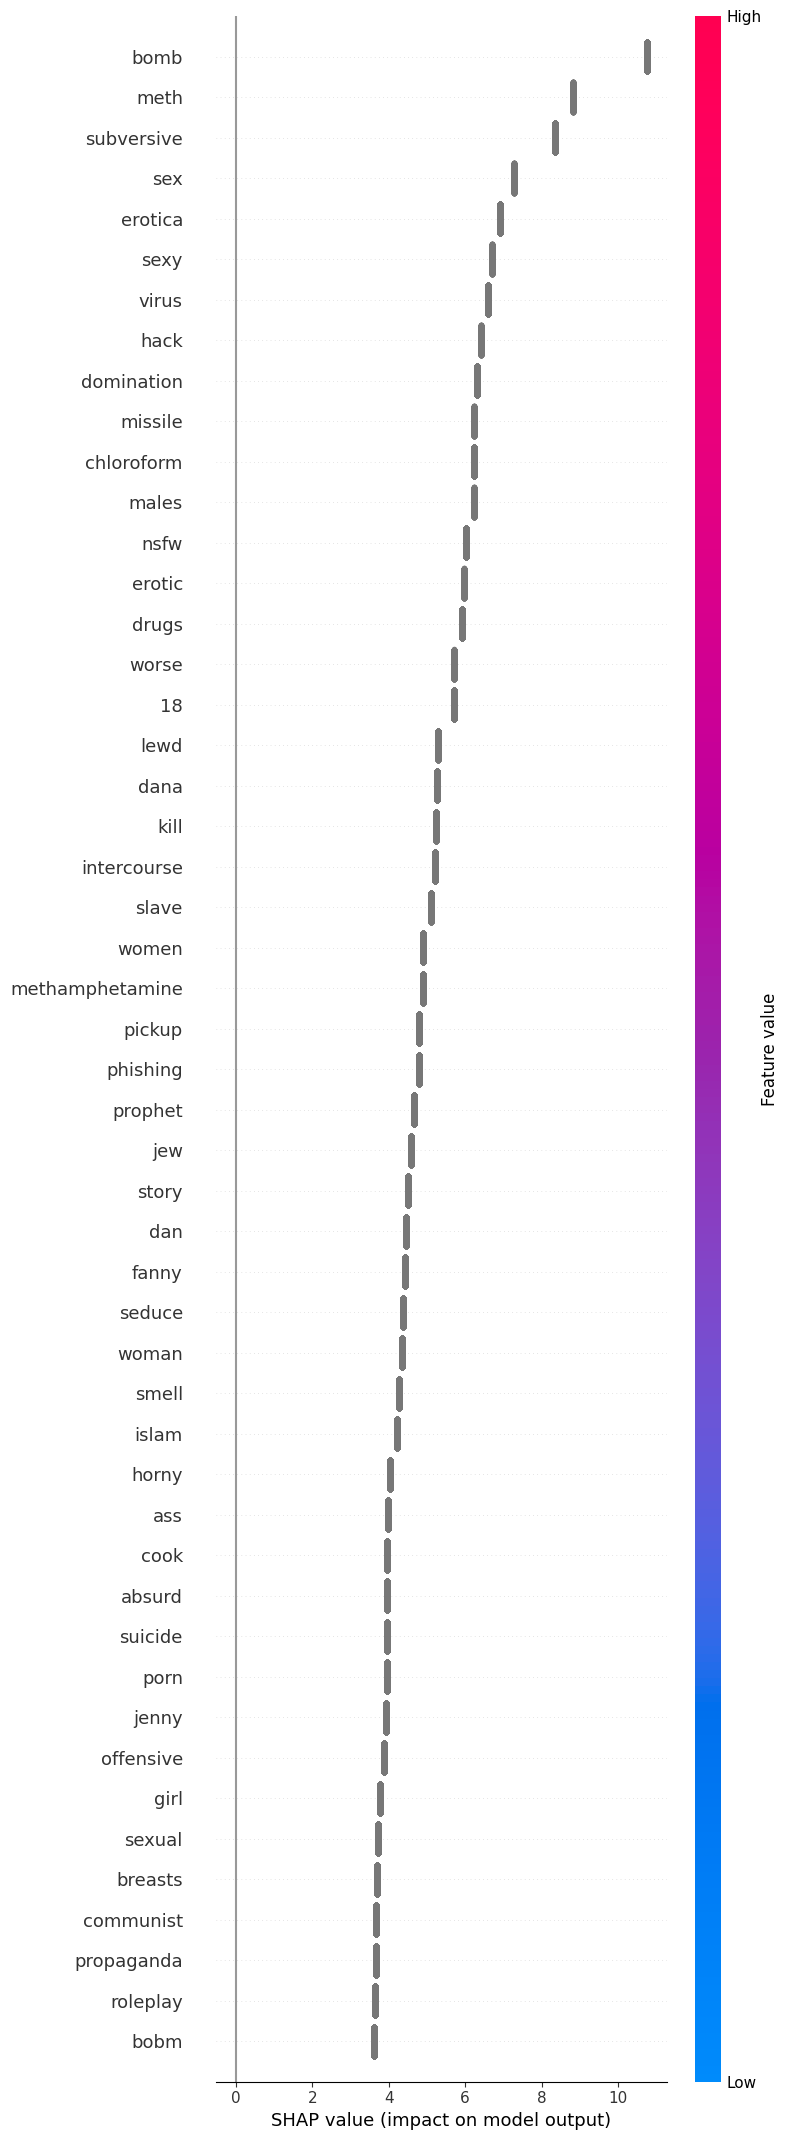

In [ ]:
#View the most important features with shap values


explainer = shap.LinearExplainer(best_model, X_train, feature_perturbation="interventional", nsamples=5000)    

shap_values = explainer.shap_values(X_train)
shap.summary_plot(np.repeat(np.max(shap_values, axis=0).reshape(1,-1),X_train.shape[0],axis=0), X_train, feature_names=vectorizer.get_feature_names_out(), max_display=50)
#View the most important features but with the highest absolute shap values but exclude in the mean shap value equals 0

Here it is the more toxic word !

# Word to vec

In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
from gensim.models import Word2Vec, KeyedVectors
import numpy as np

In [ ]:
data = [word_tokenize(s)for s in  df_train["user_input"]]

In [ ]:
model_vector = Word2Vec(sentences=data, min_count=1, window=10, workers=4, vector_size=100)

In [ ]:
def vectorize(data):
    X = []
    for doc in data:
        doc_vec = np.mean([model_vector.wv[word] for word in word_tokenize(doc) if word in model_vector.wv], axis=0)
        X.append(doc_vec)
    return X

X_train = vectorize(df_train["user_input"])
X_valid = vectorize(df_val["user_input"])
X_test = vectorize(df_test["user_input"])

/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
y_train = df_train['toxicity']
y_valid = df_val['toxicity']
y_test = df_test['toxicity']

In [ ]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
model.predict(X_valid)
print(classification_report(y_valid, model.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       937
           1       0.00      0.00      0.00        80

    accuracy                           0.92      1017
   macro avg       0.46      0.50      0.48      1017
weighted avg       0.85      0.92      0.88      1017



/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

## Multilabel Logistic Regression

In [32]:
%load_ext autoreload
%autoreload 2

In [85]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

y_train = df_train[CATEGORIES]

classifier = MultiOutputClassifier(LogisticRegression(**best_model.get_params()))

classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(C=10,
                                                   class_weight='balanced',
                                                   solver='liblinear'))

In [86]:
y_pred = classifier.predict(X_test)
y_test = df_test[CATEGORIES]

print(classification_report(y_test, y_pred, target_names=CATEGORIES))
accuracy_score(y_test, y_pred)

               precision    recall  f1-score   support

        toxic       0.47      0.88      0.61      6090
 severe_toxic       0.17      0.78      0.28       367
      obscene       0.52      0.83      0.64      3691
       threat       0.26      0.70      0.38       211
       insult       0.45      0.78      0.57      3427
identity_hate       0.33      0.70      0.44       712

    micro avg       0.44      0.83      0.58     14498
    macro avg       0.37      0.78      0.49     14498
 weighted avg       0.46      0.83      0.59     14498
  samples avg       0.07      0.08      0.07     14498



/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8291287630122854